<a href="https://colab.research.google.com/github/dinaOuahbi/Some_Data_Analysis/blob/main/Time_series(MA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- simple moving average (excel + coding)
- cumulative moving average
- expnential weight moving
- moving average formula -> AutoCorelation


In [20]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,49.633999,49.672001,48.402000,49.245998,49.245998,57304000
2017-02-28,48.838001,50.200001,48.779999,49.998001,49.998001,30390500
2017-03-01,50.835999,50.970001,49.821999,50.004002,50.004002,24047500
2017-03-02,49.942001,50.655998,49.653999,50.096001,50.096001,16759000
2017-03-03,50.147999,50.380001,49.799999,50.313999,50.313999,14597000


In [6]:
# simple moving average
'''
window                : 5
open                  : 12, 13, 15, 17, 11, 12, 5
                        ------------------
                            -------------------
                                -------------------
                                    -------------------
                                        -------------------
                                          ...
SIMPLE moving average : na, na, na, na, na, 16, 13.6, 12 
_
|     /
|    /
|   /            Smouthing the curve
|  /                  
| /            
|______________________> 

'''

'\nwindow                : 5\nopen                  : 12, 13, 15, 17, 11, 12, 5\n                        ------------------\n                        ----------------------\nSIMPLE moving average : na, na, na, na, na, 16, 13.6, 12 \n_\n|     /\n|    /\n|   /            Smouthing the curve\n|  /                  \n| /            \n|______________________> \n\n'

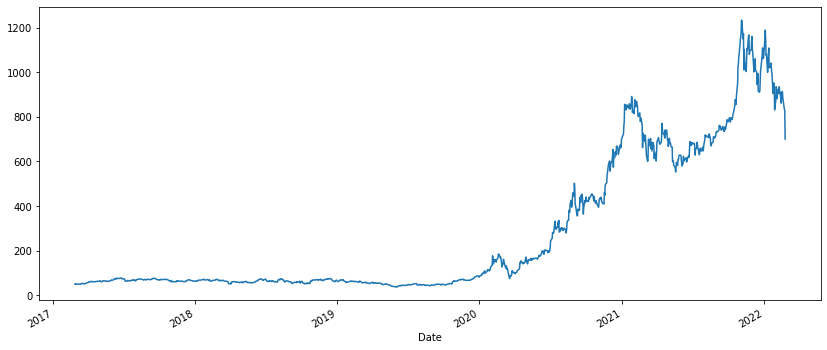

In [9]:
df['Open'].plot(figsize=(14, 6))

In [11]:
df['Open:10 days rolling'] =  df['Open'].rolling(window=10, min_periods=1).mean()

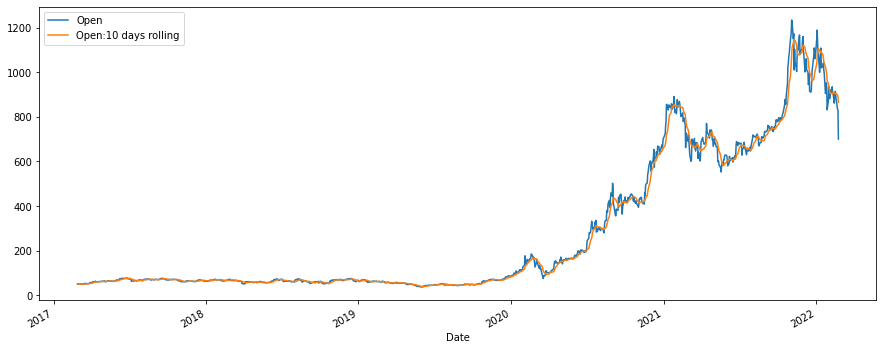

In [12]:
df[['Open', 'Open:10 days rolling']].plot(figsize=(15,6))

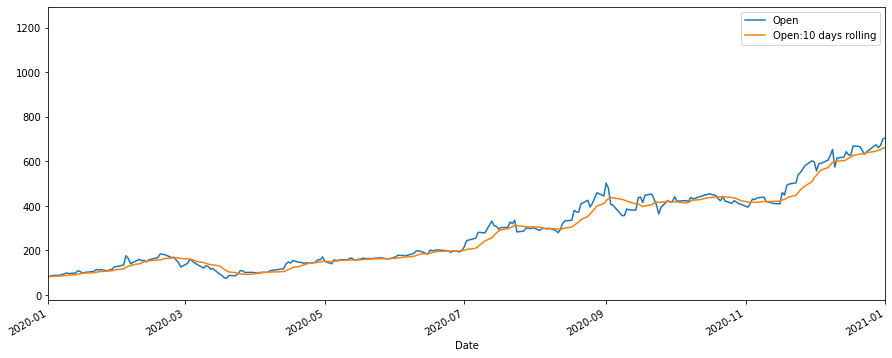

In [27]:
df[['Open', 'Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,6))

In [14]:
df['Open:10 days rolling'] =  df['Open'].rolling(window=10, min_periods=1).mean()
df['Open:20 days rolling'] =  df['Open'].rolling(window=20, min_periods=1).mean()
df['Open:30 days rolling'] =  df['Open'].rolling(window=30, min_periods=1).mean()
df['Open:40 days rolling'] =  df['Open'].rolling(window=40, min_periods=1).mean()
df['Open:50 days rolling'] =  df['Open'].rolling(window=50, min_periods=1).mean()

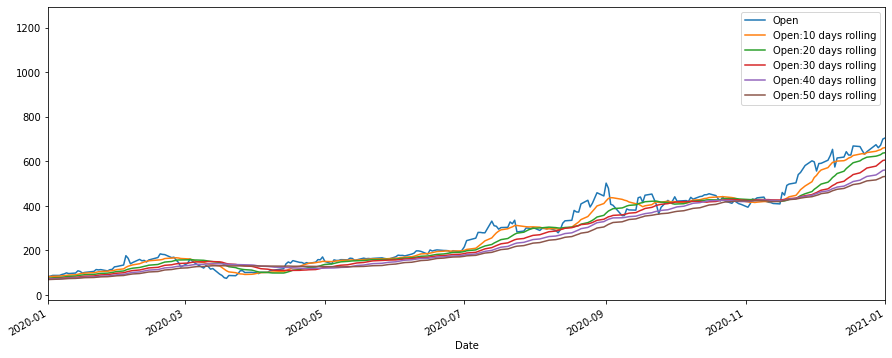

In [16]:
df[['Open', 'Open:10 days rolling', 'Open:20 days rolling', 'Open:30 days rolling', 'Open:40 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,6))

In [17]:
# exp weighing moving average

In [18]:
# cumulative moving average
'''
window                : 5
open                  : 12, 13, 15, 17, 11, 12, 5
                        ------
                        ----------
                        --------------
                        ------------------
                        ----------------------
                        ------------------------
CMA                   :
'''

'\nwindow                : 5\nopen                  : 12, 13, 15, 17, 11, 12, 5\nCMA                   :\n'

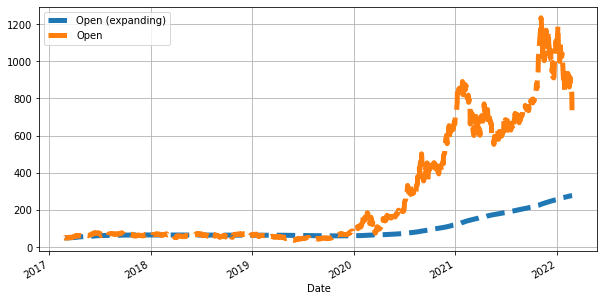

In [25]:
# expanding
plt.figure(figsize=(10,5))
df['Open'].expanding().mean().plot(lw=5, ls='--', label='Open (expanding)')
df['Open'].plot(lw=5, ls='--', label='Open')
plt.legend()
plt.grid(True)

In [32]:
# EWMA : Exp weighing moving average --> prevent lags
df['EMA_0.1'] = df['Open'].ewm(alpha=0.1, adjust=False).mean()
df['EMA_0.3'] = df['Open'].ewm(alpha=0.3, adjust=False).mean()


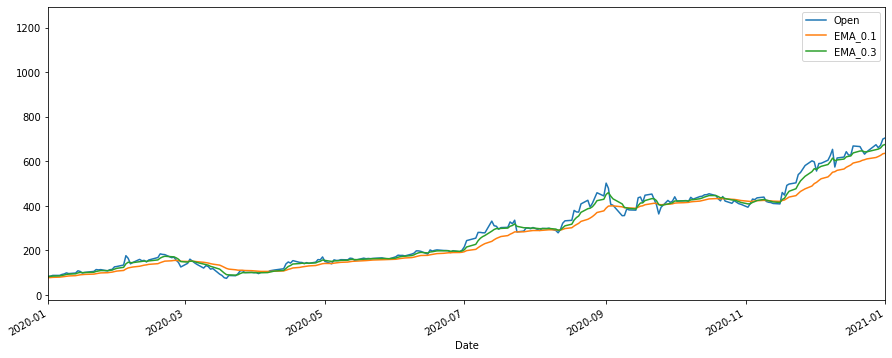

In [36]:
df[['Open', 'EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,6))